In [ ]:
# pip install tensorflow keras numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Define the class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

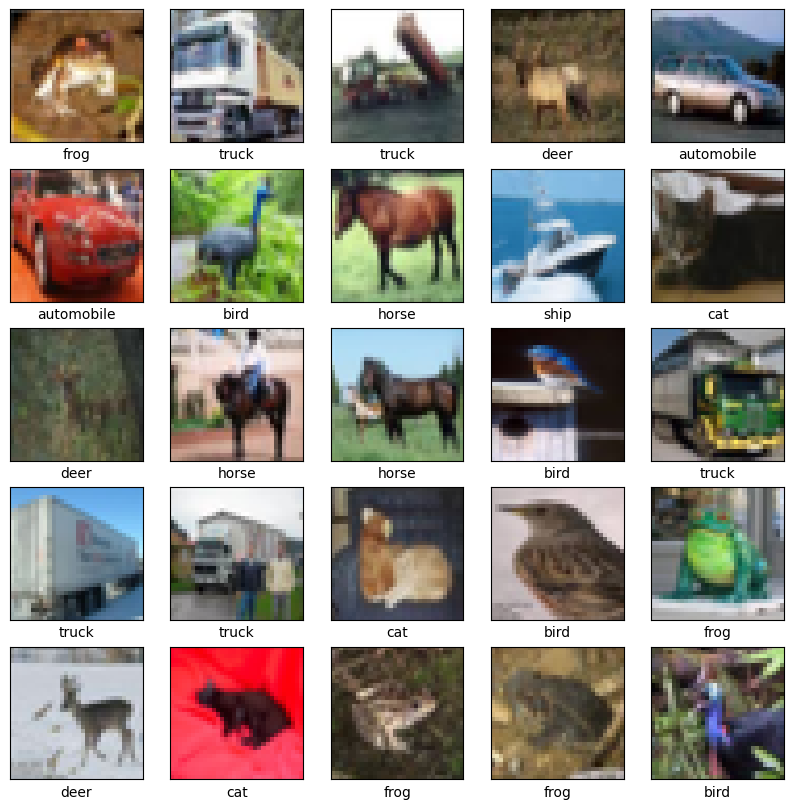

In [ ]:
# Explore the data
def plot_sample_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, which is why we need the extra index
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

plot_sample_images(train_images, train_labels)

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5008 - accuracy: 0.4558 - val_loss: 1.2376 - val_accuracy: 0.5590
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1423 - accuracy: 0.5986 - val_loss: 1.0536 - val_accuracy: 0.6298
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9930 - accuracy: 0.6525 - val_loss: 0.9496 - val_accuracy: 0.6655
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8959 - accuracy: 0.6858 - val_loss: 0.9536 - val_accuracy: 0.6702
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8258 - accuracy: 0.7100 - val_loss: 0.8933 - val_accuracy: 0.6908
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7670 - accuracy: 0.7306 - val_loss: 0.8712 - val_accuracy: 0.7050
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7143 - accuracy: 0.7487 - val_loss: 0.8616 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 5s - loss: 0.8809 - accuracy: 0.7060 - 5s/epoch - 15ms/step

Test accuracy: 0.7059999704360962


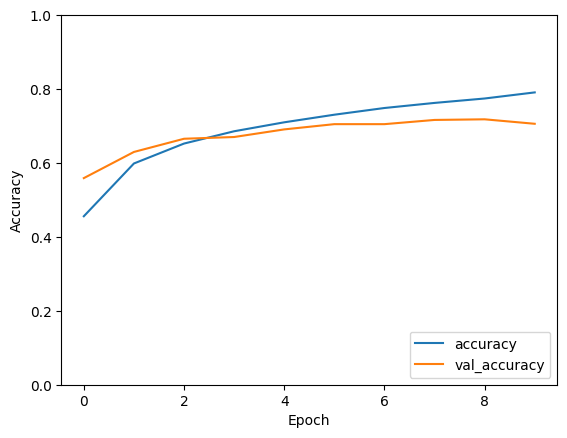

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


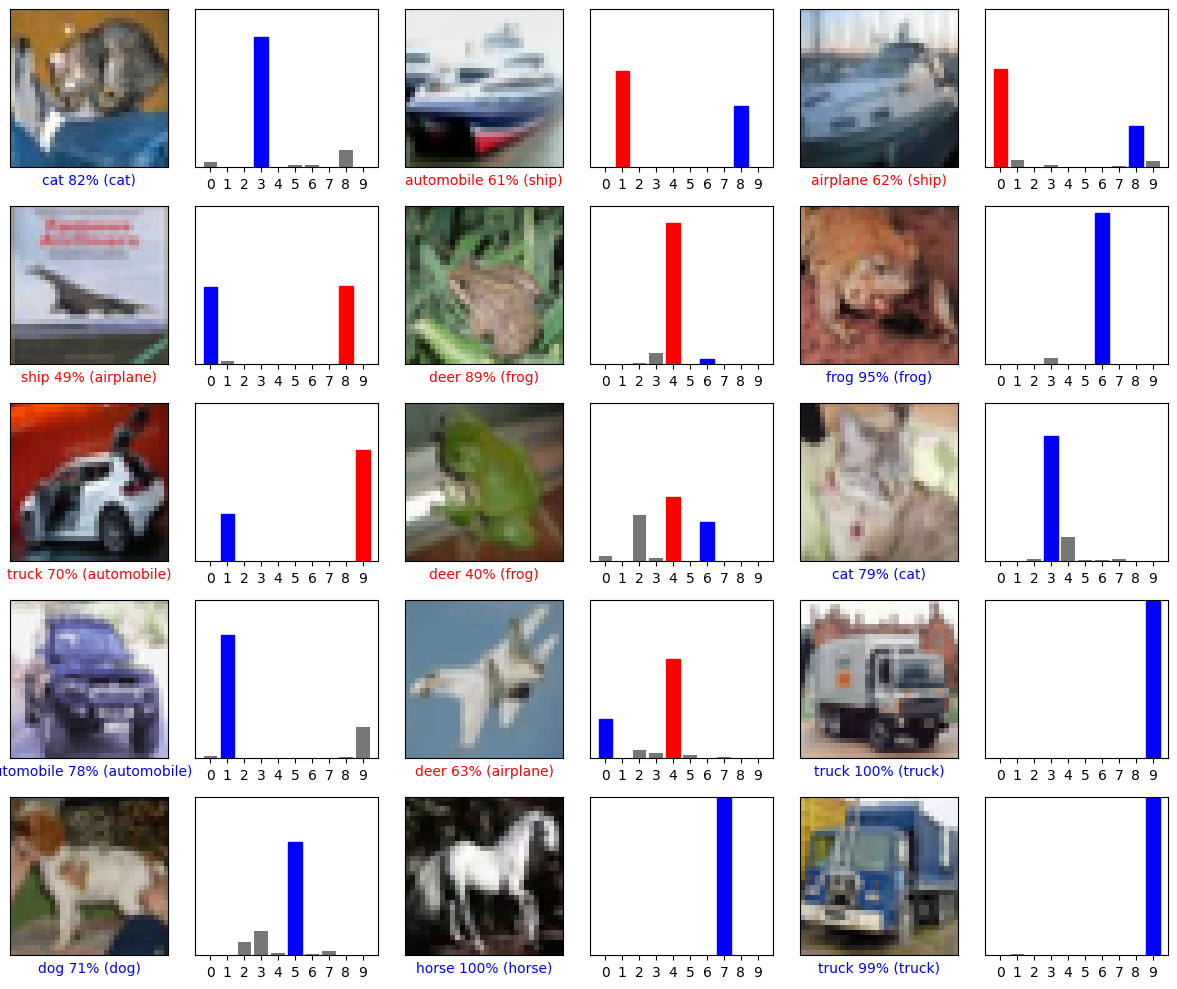

In [ ]:
# Define the plot_image function
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]  # Index true_label correctly
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

# Define the plot_value_array function
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]  # Index true_label correctly
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Run the visualization code block after the functions and predictions have been defined
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
